## Problem Statement:

Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- *LIMIT_BAL* (X1): Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- *SEX* (X2): Gender (1 = male; 2 = female).
- *EDUCATION* (X3): Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- *MARRIAGE* (X4): Marital status (1 = married; 2 = single; 3 = others).
- *AGE* (X5): Age (year).
- *PAY* (X6-X11): History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- *BILL_AMT* (X12-X17): Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- *PAY_AMT* (X18-X23): Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

- *default payment next month* (X24): Result Column 


In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('default of credit card clients.xls',header=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [6]:
df.shape

(30000, 25)

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
df=df.drop(['ID'],axis=1)

In [9]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

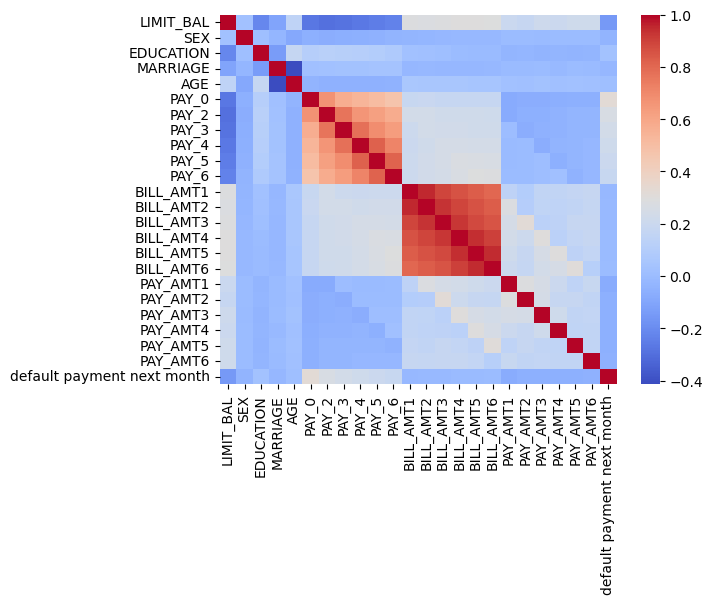

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
sns.heatmap(corr_matrix, cmap='coolwarm')

plt.show()

default payment are mainly dedendent on pay_0,pay_1.........pay_6

In [12]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=1)

# Linear Regression

we shoould not apply linear regression to classification problem still just using for experementation.
You can observe that the accuracy of the model is very low

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define the column transformer with the desired transformations
column_trans = ColumnTransformer([
    ('numeric', StandardScaler(), ['feature1', 'feature2']),
    # Specify other transformations for different columns if needed
])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)



0.11863338933244039

In [15]:
x_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

# Linear Regression with standardScaler


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Define the column transformer with the desired transformations
column_trans = ColumnTransformer([
    ('numeric', StandardScaler(), ['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']),
    # Specify other transformations for different columns if needed
])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply the column transformer to the training set
x_train_transformed = column_trans.fit_transform(x_train)

# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the transformed training data
lr.fit(x_train_transformed, y_train)

# Apply the column transformer to the testing set
x_test_transformed = column_trans.transform(x_test)

# Predict the target variable for the testing set
y_pred = lr.predict(x_test_transformed)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
r2

0.11648784350082886

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of Logistic Regression
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7811666666666667


/home/admi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic Regression with Standard Scaler

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


# Define the column transformer with the desired transformations
column_trans = ColumnTransformer([
    ('numeric', StandardScaler(), ['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']),
    # Specify other transformations for different columns if needed
])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply the column transformer to the training set
x_train_transformed = column_trans.fit_transform(x_train)

# Create an instance of Logistic Regression
model = LogisticRegression()

# Fit the model on the transformed training data
model.fit(x_train_transformed, y_train)

# Apply the column transformer to the testing set
x_test_transformed = column_trans.transform(x_test)

# Predict the target variable for the testing set
y_pred = model.predict(x_test_transformed)


# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Area Under the ROC Curve (AUC-ROC)
probas = model.predict_proba(x_test_transformed)
# auc_roc = roc_auc_score(y_test, probas, multi_class='ovr') # this is for multiclass classification
auc_roc = roc_auc_score(y_test, probas[:, 1])  # Select probabilities for positive class
print("AUC-ROC:", auc_roc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.81
Precision: 0.7940723062168986
Recall: 0.81
F1-score: 0.7684834696483067
AUC-ROC: 0.7241608792675891
Confusion Matrix:
[[4569  118]
 [1022  291]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.71      0.22      0.34      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.61      6000
weighted avg       0.79      0.81      0.77      6000



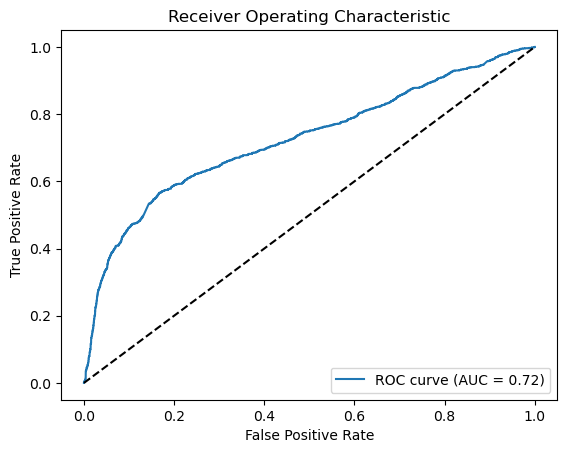

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for each class
probas = model.predict_proba(x_test_transformed)

# Compute the ROC curve for each class
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])

# Calculate the AUC score
auc = roc_auc_score(y_test, probas[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random classifier curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [20]:
# Assuming you have your data properly loaded into `x` and `y` variables

# Check the dimensions of your data
print("x shape:", x.shape)
print("y shape:", y.shape)

# Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the dimensions of the split data
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x shape: (30000, 23)
y shape: (30000,)
x_train shape: (24000, 23)
x_test shape: (6000, 23)
y_train shape: (24000,)
y_test shape: (6000,)


### Classification model evaluation methods example

# Decision tree and Random Forest Classifier

In [21]:
print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (30000, 23)
y shape: (30000,)


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Decision Tree
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict the target variable for the testing set
dt_predictions = dt_model.predict(X_test)

# Calculate the accuracy of the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest
# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the testing set
rf_predictions = rf_model.predict(X_test)

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Decision Tree Accuracy: 0.7263333333333334
Random Forest Accuracy: 0.8168333333333333


In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their respective hyperparameters
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300]})
}

best_model = None
best_accuracy = 0

# Iterate over the models and perform cross-validation with hyperparameter tuning
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its accuracy score
    best_estimator = grid_search.best_estimator_
    accuracy = grid_search.best_score_
    
    print(f"Model: {model_name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Cross-Validation Accuracy:", accuracy)
    
    # Evaluate the best model on the test set
    y_pred = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy)
    print()
    
    # Check if this model is the best so far
    if test_accuracy > best_accuracy:
        best_model = best_estimator
        best_accuracy = test_accuracy

# Use the best model for predictions
print("Best Model:", best_model)


/home/admi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/admi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Model: Logistic Regression
Best Parameters: {'C': 1}
Cross-Validation Accuracy: 0.9666666666666666
Test Accuracy: 1.0

Model: Decision Tree
Best Parameters: {'max_depth': None}
Cross-Validation Accuracy: 0.9416666666666668
Test Accuracy: 1.0

Model: Random Forest
Best Parameters: {'n_estimators': 300}
Cross-Validation Accuracy: 0.9583333333333334
Test Accuracy: 1.0

Best Model: LogisticRegression(C=1)


In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their respective hyperparameters
models = {
    'Logistic Regression': (LogisticRegression(), {'logisticregression__C': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [None, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), {'randomforestclassifier__n_estimators': [100, 200, 300]})
}

best_model = None
best_accuracy = 0

# Iterate over the models and perform cross-validation with hyperparameter tuning
for model_name, (model, param_grid) in models.items():
    # Create a pipeline with preprocessing steps and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its accuracy score
    best_estimator = grid_search.best_estimator_
    accuracy = grid_search.best_score_
    
    print(f"Model: {model_name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Cross-Validation Accuracy:", accuracy)
    
    # Evaluate the best model on the test set
    y_pred = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy)
    print()
    
    # Check if this model is the best so far
    if test_accuracy > best_accuracy:
        best_model = best_estimator
        best_accuracy = test_accuracy

# Use the best model for predictions
print("Best Model:", best_model)


ValueError: Invalid parameter logisticregression for estimator Pipeline(steps=[('scaler', StandardScaler()),
                ('Logistic Regression', LogisticRegression())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their respective hyperparameters
models = {
    'Logistic Regression': (LogisticRegression(), {'Logistic Regression__C': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'Decision Tree__max_depth': [None, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), {'Random Forest__n_estimators': [100, 200, 300]})
}

best_model = None
best_accuracy = 0

# Iterate over the models and perform cross-validation with hyperparameter tuning
for model_name, (model, param_grid) in models.items():
    # Create a pipeline with preprocessing steps and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its accuracy score
    best_estimator = grid_search.best_estimator_
    accuracy = grid_search.best_score_
    
    print(f"Model: {model_name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Cross-Validation Accuracy:", accuracy)
    
    # Evaluate the best model on the test set
    y_pred = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy)
    print()
    
    # Check if this model is the best so far
    if test_accuracy > best_accuracy:
        best_model = best_estimator
        best_accuracy = test_accuracy

# Use the best model for predictions
print("Best Model:", best_model)


Model: Logistic Regression
Best Parameters: {'Logistic Regression__C': 1}
Cross-Validation Accuracy: 0.9583333333333334
Test Accuracy: 1.0

Model: Decision Tree
Best Parameters: {'Decision Tree__max_depth': None}
Cross-Validation Accuracy: 0.9416666666666668
Test Accuracy: 1.0

Model: Random Forest
Best Parameters: {'Random Forest__n_estimators': 300}
Cross-Validation Accuracy: 0.9583333333333334
Test Accuracy: 1.0

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('Logistic Regression', LogisticRegression(C=1))])
